# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Shinta Nursobah Chairani
- **Email:** shintanursobah79@gmail.com
- **ID Dicoding:** shinta_nur

## Menentukan Pertanyaan Bisnis

- Bagaimana pola hubungan antara waktu pemesanan dengan review pelanggan?
- Berapa tingkat pengiriman tepat waktu dan bagaimana hubungannya dengan rating produk?
- Apakah ada hubungan antara jumlah pesanan dan total pendapatan per bulan?
- Bagaimana pengaruh diskon atau promosi terhadap volume penjualan dan kepuasan pelanggan?

## Import Semua Packages/Library yang Digunakan

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### List Order

In [9]:
list_orders_df = pd.read_csv('olist_orders_dataset.csv')
list_orders_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


**List Orders:**
- Kode diatas menampilkan 10 baris pertama (head (10)) dari DataFrame *list_orders_df* seperti pada gambar diatas

#### List Review

In [10]:
list_order_reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')
list_order_reviews_df.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


***

**List Order Review:**
- Kode diatas menampilkan 10 baris pertama (head (10)) dari DataFrame *list_order_reviews_df* seperti pada gambar diatas

#### List Item

In [11]:
list_order_items_df = pd.read_csv('olist_order_items_dataset.csv')
list_order_items_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


**List Order Review:**
- Kode diatas menampilkan 10 baris pertama (head (10)) dari DataFrame *list_order_items_df* seperti pada gambar diatas

### Assessing Data

#### List Order

In [12]:
list_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Jika diperhatikan, terdapat sedikit perbedaan pada jumlah data pada kolom order approved at, kolom order delivered carrier date, dan kolom order delivered customer date. Hal ini menunjukkan adanya missing values pada ketiga kolom tersebut. Selain itu, terdapat kesalahan tipe data untuk kolom order purchase timestamp, kolom order approved at, kolom delivered carrier date, kolom order delivered customer date, dan kolom estimated delivery date. Kelima kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object(string)

In [13]:
list_orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Dari gambar di atas kita bisa melihat bahwa terdapat 160 missing values pada kolom order approved at, 1783 missing values pada kolom order delivered carrier date, dan 2965 missing values pada kolom order delivered customer date. Hal ini akan ditangani nanti pada tahap Cleaning Data

In [14]:
print("Jumlah duplikasi : ", list_orders_df.duplicated().sum())

Jumlah duplikasi :  0


Setelah menjalankan kode di atas kita menemukan bahawa tidak ada data yang terduplikat.

In [15]:
list_orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Ketika kita menjalankan kode di atas kita bisa mengetahui tentang detail count, unique, top, dan frequensi tiap kolom. Tidak ada keanehan dalam data frame ini.

#### List Review

In [16]:
list_order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Jika diperhatikan, terdapat sedikit perbedaan pada jumlah data pada kolom review comment title dan kolom review comment message. Hal ini menunjukkan adanya missing values pada kedua kolom tersebut. Selain itu, terdapat kesalahan pada tipe data untuk kolom review creation date dan kolom review answer timestamp. Kedua kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object(string)

In [17]:
list_order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Dari gambar di atas kita bisa melihat bahwa terdapat 87656 missing values pada kolom review comment title dan 58247 missing values pada kolom review comment message. Hal ini akan ditangani nanti pada tahap Cleaning Data

In [18]:
print("Jumlah duplikasi : ", list_order_reviews_df.duplicated().sum())

Jumlah duplikasi :  0


Setelah menjalankan kode di atas kita menemukan bahawa tidak ada data yang terduplikat.

In [19]:
list_order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Ketika kita menjalankan kode di atas kita bisa mengetahui tentang detail count, mean, standard deviation, minimal, quartil 1, quartil 2, quartil 3, dan maximum dari kolom review score. Tidak ada keanehan dalam data frame ini.

#### List Item

In [20]:
list_order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Jika diperhatikan, tidak terdapat perbedaan pada jumlah data pada semua kolomnya. Hal ini menunjukkan bahawa tidak ada missing values pada semua kolom pada data frame ini. Akan tetapi, terdapat kesalahan tipe data untuk kolom shipping limit date yang seharusnya direpresentasikan sebagai tipe data datetime bukan object(string)

In [21]:
print("Jumlah duplikasi : ", list_order_items_df.duplicated().sum())

Jumlah duplikasi :  0


Setelah menjalankan kode di atas kita menemukan bahawa tidak ada data yang terduplikat.

In [22]:
list_order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Ketika kita menjalankan kode di atas kita bisa mengetahui tentang detail count, mean, standard deviation, minimal, quartil 1, quartil 2, quartil 3, dan maximum dari kolom order item id, kolom price, dan kolom freight value. Tidak ada keanehan dalam data frame ini.

### Cleaning Data

**Menangani missing value**

#### **List Order**

In [23]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  list_orders_df[column] = pd.to_datetime(list_orders_df[column])

Kode yang ditulis di atas akan mengubah tipe data pada kolom-kolom dalam datetime_columns menjadi datetime. Untuk memastikan hal ini berjalan sesuai harapan, periksa kembali tipe data tersebut menggunakan method info().

In [24]:
list_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Kode yang di atas berjalan sesuai harapan sehingga kelima kolom tersebut sudah bertipe data datetime.

##### Table Order Approved At

In [25]:
list_orders_df[list_orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


Berdasarkan tabel data di atas, dapat dilihat bahwa baris data tersebut masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, pada kasus ini, kita akan menggunakan metode imputation untuk menangani missing value.

In [26]:
list_orders_df['order_approved_at'] = list_orders_df['order_approved_at'].ffill()

Pada metode imputation, kita akan menggunakan nilai tertentu untuk mengganti missing value. Dikarenakan kolom order approved at merupakan kolom datetime, kita menggunakan metode forward fill untuk mengisi missing value dengan value yang ada sebelumnya. Sebenarnya kita bisa menggunakan metode lain sepeti mean, median, mode, nilai yang ditetapkan sendiri, dan backward fill.

In [27]:
list_orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Proses pembersihan missing value pada kolom order approved at berhasil sehingga memperoleh hasil seperti di atas.

##### Table Order Delivered Carrier Date

In [28]:
list_orders_df[list_orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2017-09-11 14:10:14,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2017-12-23 11:48:29,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


Berdasarkan tabel data di atas, dapat dilihat bahwa baris data tersebut masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, pada kasus ini, kita akan menggunakan metode imputation untuk menangani missing value.

In [29]:
list_orders_df['order_delivered_carrier_date'] = list_orders_df['order_delivered_carrier_date'].ffill()

Pada metode imputation, kita akan menggunakan nilai tertentu untuk mengganti missing value. Dikarenakan kolom order delivered carrier date merupakan kolom datetime, kita menggunakan metode forward fill untuk mengisi missing value dengan value yang ada sebelumnya. Sebenarnya kita bisa menggunakan metode lain sepeti mean, median, mode, nilai yang ditetapkan sendiri, dan backward fill.

In [30]:
list_orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Proses pembersihan missing value pada kolom order delivered carrier date berhasil sehingga memperoleh hasil seperti di atas.

##### Table Order Delivered Customer Date

In [31]:
list_orders_df[list_orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2017-07-11 14:58:04,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,2018-08-02 10:35:00,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,2017-07-18 12:34:04,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2017-09-11 14:10:14,2017-09-11 20:36:58,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,2018-06-06 13:12:00,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2017-12-23 11:48:29,2017-12-26 21:22:34,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,2017-12-26 21:22:34,NaT,2017-09-15


Berdasarkan tabel data di atas, dapat dilihat bahwa baris data tersebut masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, pada kasus ini, kita akan menggunakan metode imputation untuk menangani missing value.

In [32]:
list_orders_df['order_delivered_customer_date'] = list_orders_df['order_delivered_customer_date'].ffill()

Pada metode imputation, kita akan menggunakan nilai tertentu untuk mengganti missing value. Dikarenakan kolom order delivered customer date merupakan kolom datetime, kita menggunakan metode forward fill untuk mengisi missing value dengan value yang ada sebelumnya. Sebenarnya kita bisa menggunakan metode lain sepeti mean, median, mode, nilai yang ditetapkan sendiri, dan backward fill.

In [33]:
list_orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


Proses pembersihan missing value pada kolom order delivered customer date berhasil sehingga memperoleh hasil seperti di atas.

#### **List Review**

In [34]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  list_order_reviews_df[column] = pd.to_datetime(list_order_reviews_df[column])

Kode yang ditulis di atas akan mengubah tipe data pada kedua kolom dalam datetime_columns menjadi datetime. Untuk memastikan hal ini berjalan sesuai harapan, periksa kembali tipe data tersebut menggunakan method info().

In [35]:
list_order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Kode yang di atas berjalan sesuai harapan sehingga kedua kolom tersebut sudah bertipe data datetime.

##### Table Review Comment Title

In [36]:
list_order_reviews_df[list_order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


Berdasarkan tabel data di atas, dapat dilihat bahwa baris data tersebut masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, pada kasus ini, kita akan menggunakan metode imputation untuk menangani missing value.

In [37]:
list_order_reviews_df = list_order_reviews_df.assign(review_comment_title=list_order_reviews_df['review_comment_title'].fillna("Tidak Ada Judul Komentar"))

Pada metode imputation, kita akan menggunakan nilai tertentu untuk mengganti missing value. Dikarenakan kolom review comment title merupakan kolom string dan judul review setiap orang berbeda, maka kita menggunakan metode fillna  untuk mengisi missing value dengan value yang sudah ditentukan.

In [38]:
list_order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Proses pembersihan missing value pada kolom review comment title berhasil sehingga memperoleh hasil seperti di atas.

##### Table Review Comment Message

In [39]:
list_order_reviews_df[list_order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Tidak Ada Judul Komentar,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Tidak Ada Judul Komentar,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Tidak Ada Judul Komentar,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,Tidak Ada Judul Komentar,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,Tidak Ada Judul Komentar,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,Tidak Ada Judul Komentar,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,Tidak Ada Judul Komentar,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,Tidak Ada Judul Komentar,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,Tidak Ada Judul Komentar,NaN,2017-12-09,2017-12-11 20:06:42


Berdasarkan tabel data di atas, dapat dilihat bahwa baris data tersebut masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, pada kasus ini, kita akan menggunakan metode imputation untuk menangani missing value.

In [40]:
list_order_reviews_df = list_order_reviews_df.assign(review_comment_message=list_order_reviews_df['review_comment_message'].fillna("Tidak Ada Komentar"))

Pada metode imputation, kita akan menggunakan nilai tertentu untuk mengganti missing value. Dikarenakan kolom review comment message merupakan kolom string dan pesan review setiap orang berbeda, maka kita menggunakan metode fillna  untuk mengisi missing value dengan value yang sudah ditentukan.

In [41]:
list_order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


Proses pembersihan missing value pada kolom review comment message berhasil sehingga memperoleh hasil seperti di atas.

#### **List Order Items**

In [42]:
list_order_items_df["shipping_limit_date"] = pd.to_datetime(list_order_items_df["shipping_limit_date"])

Kode yang ditulis di atas akan mengubah tipe data pada kolom shipping limit date menjadi datetime. Untuk memastikan hal ini berjalan sesuai harapan, periksa kembali tipe data tersebut menggunakan method info().

In [43]:
list_order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Kode yang di atas berjalan sesuai harapan sehingga kolom shipping limit date sekarang sudah bertipe data datetime.

## Exploratory Data Analysis (EDA)

#### **List Orders**

In [44]:
list_orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 20:23:34.460584704,2018-01-05 01:00:33.728884480,2018-01-14 15:01:35.991602944,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:15:36,2017-09-18 13:50:17,2017-09-26 00:48:43,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 13:35:58,2018-01-24 17:49:18,2018-02-02 20:08:54,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 21:35:13,2018-05-08 13:51:00,2018-05-15 23:21:53,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi bahwa waktu pertama orderan yaitu saat 2016-09-04 21:15:19 dan orderan yang di approve pertama pada 2016-09-15 12:16:38. Informasi ini tentukanya dapat memberikan gambaran bahwa jarak waktu antara pemesanan dan persetujuannya adalah 11 hari.

In [45]:
delivery_time_days = list_orders_df['order_delivered_customer_date'] - list_orders_df['order_purchase_timestamp']
delivery_time_days = delivery_time_days.apply(lambda x: x.total_seconds())
list_orders_df["delivery_time_days"] = round(delivery_time_days/86400)
list_orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days
16844,83b38224c814740db730aad1c72c7a3f,6a6e92b4be5eacb3d7abed3f73d20276,delivered,2018-08-07 10:19:28,2018-08-07 10:30:14,2018-08-08 14:06:00,2018-08-13 19:19:36,2018-08-22,6.0
81650,b6940503a9b26d72b8b41ae29a88e0d1,c60a729ffd1915e57d9ac6ef86553af9,delivered,2018-05-10 14:56:04,2018-05-11 14:58:20,2018-05-15 14:52:00,2018-05-23 14:56:55,2018-06-06,13.0
77333,7be4a210a223f13fac663c64d8cb6d04,84c34f46136918961512c810eeb48ff3,delivered,2017-12-13 19:43:57,2017-12-13 20:31:34,2017-12-18 22:43:04,2017-12-26 23:33:22,2018-01-08,13.0
5291,a769126f033474696dd593d143b450d4,f104b5445c31fb5895fac27d95a3293b,delivered,2017-11-24 23:51:56,2017-11-25 02:33:18,2017-11-27 22:25:40,2017-12-01 17:29:02,2017-12-21,7.0
5788,d02a0111cedc20a548cb065955e04968,6f9bb1cf1aa360acd1a96aadeb478989,delivered,2017-11-14 09:22:00,2017-11-14 09:35:27,2017-11-24 22:51:20,2017-12-01 22:10:26,2017-12-13,18.0


Kita bisa membuat sebuah kolom baru untuk menentukan berapa hari paket sampai ke pelanggan dari awal dia pesan. Untuk melakukannya, kita perlu menghitung selisih antara order delivered customer date dan order purchase timestamp serta menyimpannya sebagai delivery time days. Selanjutnya, kita akan menggunakan method apply() untuk melakukan sebuah operasi terhadap setiap elemen dalam sebuah kolom DataFrame atau Series (bentuk satu dimensi dari DataFrame). Operasi yang akan kita lakukan ialah menghitung jumlah detik dari delivery time days menggunakan method total_seconds(). Nilai tersebut selanjutnya diubah ke dalam satuan hari (dibagi 86400) dan diambil bilangan bulatnya saja.

In [46]:
approval_time_minute = list_orders_df['order_approved_at'] - list_orders_df['order_purchase_timestamp']
approval_time_minute = approval_time_minute.apply(lambda x: x.total_seconds())
list_orders_df["approval_time_minute"] = round(approval_time_minute/60)
list_orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,approval_time_minute
20493,068254dc0ecdb91d62f52c658b4dd09a,9f0398b6761fbae87a157c3956230a1f,delivered,2018-04-04 12:00:37,2018-04-05 02:30:26,2018-04-05 18:38:41,2018-04-13 19:40:41,2018-05-09,9.0,870.0
20225,eda6d64dcda58906e8d961f3d630b6f4,093db840532a831a3a7740a8c71a24cd,delivered,2017-11-13 22:18:20,2017-11-13 22:31:23,2017-11-14 22:18:32,2017-12-05 15:59:08,2017-12-04,22.0,13.0
27093,5f12f5808949a84f28f6b6efa02a77e9,4aefbb772ae619de2cc832a2d7526ff6,delivered,2017-07-24 21:13:55,2017-07-24 21:25:19,2017-07-26 11:07:54,2017-07-28 18:54:54,2017-08-11,4.0,11.0
90782,fccfc993172f9dcf96a728c266a98dad,703e8b6dee6efc4fda4d67dd5825d28f,delivered,2017-06-06 13:39:18,2017-06-06 13:50:24,2017-06-06 14:31:36,2017-07-03 13:22:17,2017-07-03,27.0,11.0
16977,69de6dd68bcaad14dda6d5e33e45bf98,29a1b419d1654af3dbf4618bc7609c2a,delivered,2017-06-01 00:05:38,2017-06-02 01:05:30,2017-06-02 10:31:40,2017-06-08 13:03:51,2017-06-28,8.0,1500.0


Kita bisa membuat sebuah kolom baru untuk menentukan berapa menit orderan di setujui dari awal pelanggan pesan. Untuk melakukannya, kita perlu menghitung selisih antara order approved at dan order purchase timestamp serta menyimpannya sebagai approval time minute. Selanjutnya, kita akan menggunakan method apply() untuk melakukan sebuah operasi terhadap setiap elemen dalam sebuah kolom DataFrame atau Series (bentuk satu dimensi dari DataFrame). Operasi yang akan kita lakukan ialah menghitung jumlah detik dari approval time minute menggunakan method total_seconds(). Nilai tersebut selanjutnya diubah ke dalam satuan menit (dibagi 60) dan diambil bilangan bulatnya saja.

In [47]:
delivery_duration = list_orders_df['order_delivered_customer_date'] - list_orders_df['order_delivered_carrier_date']
delivery_duration = delivery_duration.apply(lambda x: x.total_seconds())
list_orders_df["delivery_duration"] = round(delivery_duration/86400)
list_orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,approval_time_minute,delivery_duration
25228,f03503cc14305b614cbfd2acf1f00c4d,0901a6c3dbfb079995b25de715c83cbe,delivered,2018-03-28 19:22:25,2018-03-28 19:35:20,2018-03-29 18:19:05,2018-04-06 20:21:56,2018-04-20,9.0,13.0,8.0
71243,7e4f454abfc163899a6ef5b4d5facfb2,e09646444511bcbf9141bf44ab8e8ab2,delivered,2017-12-15 06:52:25,2017-12-15 07:11:03,2017-12-15 19:45:04,2017-12-19 22:23:49,2018-01-15,5.0,19.0,4.0
93968,4c4c18f172becac0b104709006c11a9b,4bf3c039809b9e6d39e8c207bb5d6325,delivered,2017-12-01 17:12:58,2017-12-05 04:17:31,2017-12-06 21:26:47,2018-01-04 00:13:32,2018-01-08,33.0,4985.0,28.0
33547,94bc8ddcff97b273c27ce96992e0425d,dd606722b1d47306f006d765d17501ae,delivered,2017-03-10 09:50:27,2017-03-10 09:50:27,2017-03-17 14:16:09,2017-03-31 14:05:31,2017-03-31,21.0,0.0,14.0
25397,28c82a8f08d843332818f4f2673e0128,f8897ca2b66630b4d587f8daab079c08,delivered,2017-09-04 22:09:17,2017-09-04 22:23:55,2017-09-08 17:35:59,2017-09-26 18:22:53,2017-09-27,22.0,15.0,18.0


Kita bisa membuat sebuah kolom baru untuk menentukan berapa hari orderan sampai ke pelanggan dari waktu pengiriman oleh kurir. Untuk melakukannya, kita perlu menghitung selisih antara order delivered customer date dan order delivered carrier date serta menyimpannya sebagai delivery duration. Selanjutnya, kita akan menggunakan method apply() untuk melakukan sebuah operasi terhadap setiap elemen dalam sebuah kolom DataFrame atau Series (bentuk satu dimensi dari DataFrame). Operasi yang akan kita lakukan ialah menghitung jumlah detik dari delivery duration menggunakan method total_seconds(). Nilai tersebut selanjutnya diubah ke dalam satuan hari (dibagi 86400) dan diambil bilangan bulatnya saja.

In [48]:
delivery_time_difference = list_orders_df['order_delivered_customer_date'] - list_orders_df['order_estimated_delivery_date']
delivery_time_difference = delivery_time_difference.apply(lambda x: x.total_seconds())
list_orders_df["delivery_time_difference"] = round(delivery_time_difference/86400)
list_orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,approval_time_minute,delivery_duration,delivery_time_difference
70063,787bfd3b90a91fda23d2e58665f5e1ac,b6989f57cde250a32b82bddef73c3c84,delivered,2018-06-21 13:48:11,2018-06-21 14:22:02,2018-06-21 14:01:00,2018-06-28 22:21:51,2018-07-20,7.0,34.0,7.0,-21.0
10349,0756c3213eb9155bc1209caced66eb82,57aea3c0424ba421f4a819dbdd9fcb33,delivered,2017-12-21 23:01:24,2017-12-22 16:31:18,2017-12-27 17:58:14,2018-01-10 23:19:37,2018-01-23,20.0,1050.0,14.0,-12.0
67929,6feae1bd5cdc1727594445028310015f,7b039396f4d695564083b7360a6fc38a,delivered,2017-02-04 21:38:34,2017-02-04 21:50:13,2017-02-07 14:58:17,2017-02-15 16:45:29,2017-03-15,11.0,12.0,8.0,-27.0
65279,7f8f6e7d331e83effb58aa14f32cad44,45127f59fac3645efb3f2c3c185bf0da,delivered,2017-03-26 10:23:11,2017-03-26 10:35:12,2017-03-30 18:46:10,2017-04-10 07:37:54,2017-04-13,15.0,12.0,11.0,-3.0
43229,38c27dfc491d9aabf7733ae9a163f8af,12e631e6faa17d9566a8fa96e5cc3e61,delivered,2018-06-12 01:22:04,2018-06-12 01:35:13,2018-06-12 15:51:00,2018-06-13 20:31:53,2018-06-21,2.0,13.0,1.0,-7.0


Kita bisa membuat sebuah kolom baru untuk menentukan perbedaan waktu antara pesanan sampai ke pelanggan dengan perkiraan sampainya agar bisa menganalisis apakah lebih cepat atau lambat dari yang diperkirakan. Untuk melakukannya, kita perlu menghitung selisih antara order delivered customer date dan order estimated delivery date serta menyimpannya sebagai delivery time difference. Selanjutnya, kita akan menggunakan method apply() untuk melakukan sebuah operasi terhadap setiap elemen dalam sebuah kolom DataFrame atau Series (bentuk satu dimensi dari DataFrame). Operasi yang akan kita lakukan ialah menghitung jumlah detik dari delivery time difference menggunakan method total_seconds(). Nilai tersebut selanjutnya diubah ke dalam satuan hari (dibagi 86400) dan diambil bilangan bulatnya saja.

In [49]:
order_processing_time = list_orders_df['order_delivered_carrier_date'] - list_orders_df['order_approved_at']
order_processing_time = order_processing_time.apply(lambda x: x.total_seconds())
list_orders_df["order_processing_time"] = round(order_processing_time/86400)
list_orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,approval_time_minute,delivery_duration,delivery_time_difference,order_processing_time
29297,23538663b36489215fd49765baa4ba8f,14b0912a842b58de740de4a7b5ec8e1d,delivered,2018-08-05 14:07:53,2018-08-06 14:04:43,2018-08-08 08:39:00,2018-08-16 16:27:51,2018-08-28,11.0,1437.0,8.0,-11.0,2.0
90416,ec16a756476054ae786f87878df0e047,21a5eeb6e3adcff02126e809508dd9f7,delivered,2017-09-29 09:05:28,2017-09-29 09:23:48,2017-10-02 21:32:25,2017-10-09 23:14:23,2017-10-24,11.0,18.0,7.0,-14.0,4.0
35736,1d8747e28d2a17848780cacc9b445280,910c0c38cc99cb4a16a2d3c764bfdba0,delivered,2017-07-13 20:16:58,2017-07-14 16:15:23,2017-07-19 18:27:36,2017-07-31 18:26:46,2017-08-04,18.0,1198.0,12.0,-3.0,5.0
47938,0aee3a9d7c585888c61c307c40df0c0b,922397e11abc5f3d52e248f57df8804e,delivered,2018-06-11 08:58:16,2018-06-11 09:12:18,2018-06-11 09:55:00,2018-06-22 19:42:02,2018-07-11,11.0,14.0,11.0,-18.0,0.0
27166,a150844c1dfa605f925885746f98fe55,b804b2833d003cbf0ca148ee493d46f8,delivered,2017-10-22 13:20:33,2017-10-22 13:35:19,2017-10-23 14:59:49,2017-10-30 14:53:22,2017-11-09,8.0,15.0,7.0,-9.0,1.0


Kita bisa membuat sebuah kolom baru untuk menentukan waktu proses pesanan dari saat pesanan disetujui hingga diserahkan kepada jasa pengiriman agar dapat menganalisis efisiensi pemrosesan pesanan. Untuk melakukannya, kita perlu menghitung selisih antara order_delivered_carrier_date dan order_approved_at serta menyimpannya sebagai order_processing_time. Selanjutnya, kita menggunakan method apply() untuk melakukan operasi pada setiap elemen dalam Series hasil selisih tersebut, dengan menghitung jumlah detik dari order_processing_time menggunakan method total_seconds(). Nilai yang diperoleh kemudian diubah ke dalam satuan hari dengan membaginya dengan 86.400 (jumlah detik dalam sehari) dan hasilnya dibulatkan.

In [50]:
list_orders_df.groupby(by="order_status").agg({
    "order_id": "nunique",
    "delivery_time_days": ["max", "min", "mean"],
    "approval_time_minute": ["max", "min", "mean"],
    "delivery_duration": ["max", "min", "mean"],
    "delivery_time_difference": ["max", "min", "mean"],
    "order_processing_time": ["max", "min", "mean"]
})

order_id delivery_time_days                     \
              nunique                max    min        mean   
order_status                                                  
approved            2              520.0  337.0  428.500000   
canceled          625              693.0 -521.0   28.267200   
created             5              235.0 -218.0  101.400000   
delivered       96478              319.0 -415.0   12.503949   
invoiced          314              692.0 -423.0   95.799363   
processing        301              579.0 -369.0  132.780731   
shipped          1107              653.0 -552.0   42.140921   
unavailable       609              688.0 -532.0  118.387521   

             approval_time_minute                          delivery_duration  \
                              max       min           mean               max   
order_status                                                                   
approved                   8347.0      12.0    4179.500000              18.0   
canceled                 986949.0 -801569.0   -1308.657600             204.0   
created                  326382.0 -320917.0  133924.400000               9.0   
delivered                753544.0       0.0     701.030256             205.0   
invoiced                   7577.0       6.0     542.175159              49.0   
processing                87052.0       0.0    1029.186047             137.0   
shipped                   47043.0       0.0     704.028004             609.0   
unavailable              270551.0       0.0    1463.316913             228.0   

                               delivery_time_difference                     \
                min       mean                      max    min        mean   
order_status                                                                 
approved        1.0   9.500000                    498.0  310.0  404.000000   
canceled     -460.0   1.654400                    651.0 -531.0    5.828800   
created         3.0   5.800000                    201.0 -244.0   74.000000   
delivered    -417.0   9.274228                    291.0 -443.0  -11.020772   
invoiced     -432.0   7.372611                    638.0 -427.0   70.649682   
processing   -277.0   7.754153                    525.0 -394.0  103.089701   
shipped      -555.0  38.355014                    608.0 -568.0   17.196929   
unavailable   -41.0  10.316913                    636.0 -542.0   95.174056   

             order_processing_time                     
                               max    min        mean  
order_status                                           
approved                     519.0  313.0  416.000000  
canceled                     664.0 -518.0   27.540800  
created                        6.0   -1.0    2.600000  
delivered                    314.0 -518.0    2.746357  
invoiced                     684.0 -425.0   88.073248  
processing                   569.0 -386.0  124.285714  
shipped                       41.0   -4.0    3.290876  
unavailable                  676.0 -535.0  107.057471

Berdasarkan hasil analisis di atas, dapat dilihat bahwa status pesanan yang paling umum adalah delivered, dengan jumlah pesanan unik mencapai 96.478, menunjukkan bahwa sebagian besar pesanan berhasil dikirimkan kepada pelanggan. Di sisi lain, terdapat 1.107 pesanan yang sedang dalam status shipped, yang berarti sudah dikirim tetapi belum sampai ke tujuan. Namun, ada juga sejumlah pesanan yang mengalami masalah, seperti 625 pesanan yang dibatalkan (canceled) dan 609 pesanan yang tidak tersedia (unavailable). Selain itu, sebanyak 314 pesanan sudah dibuatkan faktur (invoiced), sementara 301 pesanan masih dalam proses (processing). Hanya 5 pesanan yang baru dibuat (created) dan 2 pesanan yang sudah disetujui (approved). Temuan ini memberikan gambaran yang jelas mengenai efisiensi pemrosesan dan pengiriman pesanan dalam sistem ini.
Selain itu, dapat diketahui juga bahwa rata-rata waktu pengiriman yang berhasil sampai ke pelanggan sebesar 12 hari dengan nilai maksimum 319 hari atau sekitar 10 bulan lebih. Diketahui juga rata-rata pesanan disetujui sebesar 701 menit atau sekitar 11 jam lebih dengan nilai maksimum 753.544 menit atau sekitar 523 hari dan nilai minimum 0 menit. Selain itu, rata-rata lama pengiriman dari kurir ke pelanggan sebesar 9 hari dengan nilai maksimum sebesar 205 hari atau sekitar 6 bulan lebih. Rata-rata perbedaan perkiraan waktu sampai dengan waktu sampai ke pelanggan yang sebenarnya adalah lebih lambat 11 hari dengan perbedaan paling cepat adalah 291 hari dan paling lambat 443 hari. Proses pengiriman rata-rata membutuhkan waktu sebesar 2 hari dari pesanan disetujui ke pengiriman oleh kurir sedangkan paling lama 314 hari atau sekitar 10 bulan lebih.

In [51]:
list_orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,approval_time_minute,delivery_duration,delivery_time_difference,order_processing_time
count,99441,99441,99441,99441,99441,99441,99441,99441,99441.000000,99441.000000,99441.000000,99441.000000,99441.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 20:23:34.460584704,2018-01-05 01:00:33.728884480,2018-01-14 15:01:35.991602944,2018-01-24 03:08:37.730111232,14.221327,700.361159,9.545680,-9.334470,4.192707
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,-552.000000,-801569.000000,-555.000000,-568.000000,-535.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:15:36,2017-09-18 13:50:17,2017-09-26 00:48:43,2017-10-03 00:00:00,7.000000,13.000000,4.000000,-16.000000,1.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 13:35:58,2018-01-24 17:49:18,2018-02-02 20:08:54,2018-02-15 00:00:00,10.000000,21.000000,7.000000,-12.000000,2.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 21:35:13,2018-05-08 13:51:00,2018-05-15 23:21:53,2018-05-25 00:00:00,16.000000,876.000000,12.000000,-6.000000,4.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,693.000000,986949.000000,609.000000,651.000000,684.000000


Berdasarkan kolom status pesanan, mayoritas pesanan tercatat sebagai "delivered" dengan frekuensi mencapai 96.478. Waktu pemesanan berkisar dari 4 September 2016 hingga 17 Oktober 2018, dengan tanggal persetujuan berkisar antara 15 September 2016 hingga 3 September 2018. Rata-rata waktu pengiriman adalah sekitar 14,22 hari, sedangkan waktu persetujuan rata-rata adalah 700,36 menit. Nilai delivery time days menunjukkan rentang waktu pengiriman yang bervariasi, dari -552 hari hingga 693 hari, dengan deviasi standar sebesar 40,94, yang mengindikasikan adanya variasi signifikan dalam waktu pengiriman. Hal ini menunjukkan bahwa meskipun sebagian besar pesanan berhasil dikirim tepat waktu, terdapat beberapa pesanan yang mengalami penundaan yang cukup lama, yang perlu dievaluasi lebih lanjut untuk meningkatkan kinerja pengiriman di masa mendatang.

#### **List Reviews**

In [52]:
list_order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Tidak Ada Judul Komentar,Tidak Ada Komentar,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi bahwa rata-rata orang mereview pada tanggal 2018-01-12 dan dijawab pada 2018-01-16. Review pertama terjadi pada 2016-10-02 dan review yang pertama kali di jawab pada 2016-10-07. Review yang ditulis terakhir kali pada 2018-08-31 dan review yang dijawab terakhir kali pada 2018-10-29.

In [53]:
review_time_difference = list_order_reviews_df['review_answer_timestamp'] - list_order_reviews_df['review_creation_date']
review_time_difference = review_time_difference.apply(lambda x: x.total_seconds())
list_order_reviews_df["review_time_difference"] = round(review_time_difference/86400)
list_order_reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_time_difference
97038,0a334f013671ce87b70b4dccdcb73157,1161944e39519870ff70405caa44acce,4,Tidak Ada Judul Komentar,Tidak Ada Komentar,2017-03-14,2017-03-16 23:33:09,3.0
16788,bbb484abfa8d62d51da84adf471be3fa,102dc75f04e28c228169dedb666dcd3e,4,Tidak Ada Judul Komentar,Tidak Ada Komentar,2018-01-05,2018-01-08 12:43:32,4.0
88839,640f2807afa271cfa90c2fb2e16f57ac,b8f1d12f21b83fdb91d157f357617d90,5,Tidak Ada Judul Komentar,Tidak Ada Komentar,2018-07-11,2018-07-11 17:05:39,1.0
87862,4db448426bc45607e4da70d32fa604a5,d9547df3c08b9a1d75ac31317de05c25,5,Tidak Ada Judul Komentar,Tidak Ada Komentar,2017-05-25,2017-05-25 13:34:09,1.0
55561,cbbd63d7179e338bef9d72f245cad3fd,352d885bc141f75e361bbf6501513d25,4,Tidak Ada Judul Komentar,Tidak Ada Komentar,2018-04-01,2018-04-03 15:14:53,3.0


Kita bisa membuat sebuah kolom baru untuk menentukan perbedaan waktu antara waktu jawaban dari ulasan dan waktu pembuatan ulasan agar dapat menganalisis seberapa cepat atau lambat respon terhadap ulasan yang diberikan. Untuk melakukannya, kita perlu menghitung selisih antara review_answer_timestamp dan review_creation_date, dan menyimpannya sebagai review_time_difference. Selanjutnya, kita akan menggunakan method apply() untuk menerapkan operasi pada setiap elemen dalam kolom review_time_difference. Operasi yang akan kita lakukan adalah menghitung jumlah detik dari selisih waktu tersebut menggunakan method total_seconds(). Nilai tersebut kemudian diubah ke dalam satuan hari dengan membaginya dengan 86400 (jumlah detik dalam satu hari) dan dibulatkan menjadi bilangan bulat.

In [54]:
list_order_reviews_df.groupby(by="review_score").review_id.nunique().sort_values(ascending=False)

,review_id
review_score,
5,56910
4,19007
1,11282
3,8097
2,3114


Berdasarkan analisis terhadap data ulasan pesanan, hasilnya menunjukkan bahwa skor 5 mendapatkan jumlah ulasan terbanyak, yakni sebanyak 56.910 ulasan, yang menandakan bahwa banyak pelanggan sangat puas dengan produk atau layanan yang mereka terima. Diikuti oleh skor 4 dengan 19.007 ulasan, menunjukkan bahwa masih banyak pelanggan yang merasa puas meski tidak sebanyak skor 5. Sementara itu, skor 1 mencatat 11.282 ulasan, menandakan adanya sejumlah pelanggan yang tidak puas atau mengalami masalah. Skor 3 dan 2 memiliki jumlah ulasan yang lebih rendah, masing-masing sebanyak 8.097 dan 3.114. Hal ini menunjukkan bahwa terdapat lebih sedikit pelanggan yang memberikan ulasan netral atau negatif. Secara keseluruhan, mayoritas pelanggan memberikan ulasan positif, dengan sebagian kecil memberikan ulasan negatif, yang dapat menjadi indikator bagi perusahaan untuk mengevaluasi dan meningkatkan aspek tertentu dari produk atau layanan yang ditawarkan.

In [55]:
list_order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_time_difference
count,99224,99224,99224.000000,99224,99224,99224,99224,99224.000000
unique,98410,98673,NaN,4528,36160,NaN,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Tidak Ada Judul Komentar,Tidak Ada Komentar,NaN,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688,3.213658
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28,0.000000
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872,1.000000
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000,2.000000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000,3.000000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35,519.000000


Berdasarkan hasil tersebut, dapat disimpulkan bahwa rata-rata review pelanggan dijawab sebesar 3 hari dengan paling lama 519 hari atau sekitar 17 bulan dan paling cepat pada hari pembuatan reviewnya.

#### **List Items**

In [56]:
list_order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


Berdasarkan hasil tersebut, dapat dilihat bahwa order dengan ID paling sering muncul adalah 8272b63d03f5f79c56e9e4120aec44ef, yang terdaftar sebanyak 21 kali. Rata-rata jumlah item per order adalah sekitar 1,2, menunjukkan bahwa mayoritas order terdiri dari satu item. Waktu pengiriman tercatat dengan batas pengiriman paling awal pada 19 September 2016 dan batas terakhir pada 9 April 2020. Rata-rata harga produk adalah sekitar 120,65 dollar, dengan harga terendah mencapai 0,85 dollar dan tertinggi 6735 dollar. Selain itu, nilai pengiriman berkisar antara 0 hingga 409,68 dollar, dengan rata-rata nilai pengiriman sebesar 19,99 dollar.Penyebaran harga menunjukkan variasi yang cukup besar, dengan deviasi standar sebesar 183,63 dollar. Dari analisis ini, dapat disimpulkan bahwa data order item menunjukkan beragam produk dan nilai, serta pola pemesanan yang cenderung konsisten dengan kebiasaan berbelanja yang umum.

In [57]:
list_order_items_df['total_price'] = list_order_items_df['price'] + list_order_items_df['freight_value']
list_order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
97655,dd8df609ed4683bda8dd7515115f3b50,1,431d674f9a4fbd0957ecf6ba3fcb6899,53243585a1d6dc2643021fd1853d8905,2017-09-14 08:45:09,299.99,27.38,327.37
95766,d93ef0caa7a160caec60b4d6833415a6,2,98ae511715bfce7d97ef0ff1859ad05f,973f21788dfab357250f69a8dcb7ddee,2018-06-29 16:38:27,45.00,23.31,68.31
29187,426787854631af08093236fbcd0cd554,1,165f86fe8b799a708a20ee4ba125c289,7ddcbb64b5bc1ef36ca8c151f6ec77df,2017-12-14 00:31:03,166.99,23.49,190.48
72537,a56b1d8a1e6ef5179f68ce22ff4454f5,1,d7973e54f0df08e88e0500f722dd8bce,7722b1df1b0e383e000397b2c11e3e19,2017-03-02 11:01:57,13.90,10.96,24.86
76287,adb00f908ea2044d0001f86671d882af,2,a19b6951c75da43aad691622dd2f6abe,1025f0e2d44d7041d6cf58b6550e0bfa,2017-10-27 20:25:48,38.40,13.08,51.48


Kita bisa membuat sebuah kolom baru untuk menentukan total biaya yang dikeluarkan untuk melakukan pemesanan. Untuk melakukannya, kita perlu menghitung penjumlahan antara price (biaya orderan) dan freight value(biaya ongkir), dan menyimpannya sebagai total price.

In [58]:
list_order_items_df["price_group"] = list_order_items_df.price.apply(lambda x: "Cheap" if x <= 40 else ("Expensive" if x > 135 else "Average Price"))
list_order_items_df.groupby(by="price_group").agg({
    "order_id": "nunique",
    "product_id": "nunique",
    "order_item_id": "nunique",
    "seller_id": "nunique"
})

,order_id,product_id,order_item_id,seller_id
price_group,,,,
Average Price,48956,14823,20,2155
Cheap,24727,8904,21,1492
Expensive,25939,9948,11,1817


Dari tabel yang berisi empat kategori: **order_id**, **product_id**, **order_item_id**, dan **seller_id**, data diorganisir berdasarkan tiga kelompok harga yaitu *Average Price* (harga rata-rata), *Cheap* (murah), dan *Expensive* (mahal). Pada kelompok *Average Price*, terdapat 48.956 order dengan 14.823 produk, 20 order item per transaksi, dan melibatkan 2.155 seller. Di kategori *Cheap*, jumlah order sedikit lebih rendah, yaitu 24.727 order dengan 8.904 produk, 21 order item per transaksi, dan melibatkan 1.492 seller. Sementara itu, di kelompok *Expensive*, jumlah order mencapai 25.939 dengan 9.948 produk, 11 order item per transaksi, dan melibatkan 1.817 seller. Dari data ini, dapat disimpulkan bahwa meskipun kelompok *Expensive* memiliki lebih sedikit order item per transaksi, mereka masih menghasilkan lebih banyak order dibandingkan kategori *Cheap*. Keterlibatan seller juga lebih tinggi pada kelompok harga rata-rata dan mahal, yang menunjukkan bahwa seller lebih aktif di segmen harga tersebut.

In [59]:
list_order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,price_group
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112650.000000,112650
unique,98666,NaN,32951,3095,NaN,NaN,NaN,NaN,3
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,NaN,Average Price
freq,21,NaN,527,2033,NaN,NaN,NaN,NaN,55253
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320,140.644059,NaN
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,6.080000,NaN
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000,55.220000,NaN
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000,92.320000,NaN
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000,157.937500,NaN
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,6929.310000,NaN


Berdasarkan hasil tersebut, dapat diketahui bahwa rata-rata total biaya orderan tanpa biaya admin sebesar 120 dolar dengan nilai maksimum sebesar 6735 dolar dan nilai minimum sebesar 0,85 dolar. Biaya admin tertinggi sebesar 409,68 dolar dan ada biaya admin 0 dolar(gratis) dengan rata-rata biaya admin sebesar 19 dolar. Orderan terbesar sampai menyentuh angka 6929 dolar dan terkecil sebesar 6,08 dolar dengan rata-rata 140,64 dolar.

#### **Gabungan List order dan List review**

In [60]:
orders_review_df = pd.merge(
    left=list_order_reviews_df,
    right=list_orders_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_time_difference,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,approval_time_minute,delivery_duration,delivery_time_difference,order_processing_time
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Tidak Ada Judul Komentar,Tidak Ada Komentar,2018-01-18,2018-01-18 21:46:59,1.0,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,6.0,17.0,5.0,-15.0,1.0
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Tidak Ada Judul Komentar,Tidak Ada Komentar,2018-03-10,2018-03-11 03:05:13,1.0,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,9.0,23.0,7.0,-4.0,2.0
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Tidak Ada Judul Komentar,Tidak Ada Komentar,2018-02-17,2018-02-18 14:36:24,2.0,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09,13.0,37.0,10.0,-20.0,3.0
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Tidak Ada Judul Komentar,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,1.0,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10,11.0,14.0,10.0,-20.0,1.0
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Tidak Ada Judul Komentar,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1.0,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09,18.0,289.0,13.0,-8.0,5.0


Pada kode di atas, kita melakukan proses merge dengan metode “left”. Terdapat banyak sekali informasi yang bisa kita eksplore dari data di atas. Berikut merupakan beberapa hal yang bisa dijelajahi.\

- Jumlah order berdasarkan skor

In [61]:
orders_review_df.groupby(by="review_score").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,review_score,order_id
0,5,57076
1,4,19098
2,1,11393
3,3,8160
4,2,3148


Berdasarkan data yang disajikan, terdapat variasi dalam penilaian (review score) yang diberikan oleh pelanggan terhadap produk atau layanan yang mereka gunakan. Dari total keseluruhan order yang terdistribusi di antara berbagai skor, skor tertinggi yaitu 5, mencatatkan 57.076 order, menunjukkan bahwa mayoritas pelanggan merasa sangat puas dengan pengalaman mereka. Di sisi lain, skor 4 mencatatkan 19.098 order, yang juga menunjukkan tingkat kepuasan yang baik, meskipun sedikit menurun dibandingkan dengan skor 5. Namun, terdapat penilaian yang rendah, dengan skor 1 hanya mencatatkan 11.393 order, serta skor 2 yang mencatatkan 3.148 order, menunjukkan adanya ketidakpuasan di antara sebagian pelanggan. Skor 3, yang mencakup 8.160 order, mencerminkan persepsi netral terhadap produk atau layanan. Dengan demikian, meskipun sebagian besar pelanggan memberikan ulasan positif, terdapat juga indikasi adanya area yang perlu ditingkatkan untuk meningkatkan kepuasan pelanggan secara keseluruhan.

- Jumlah review berdasarkan kelompok lama approval

In [62]:
orders_review_df["approval_group"] = orders_review_df.approval_time_minute.apply(lambda x: "Fast" if x <= 13 else ("Long" if x >= 21 else "Average"))
orders_review_df.groupby(by="approval_group").review_id.nunique().sort_values(ascending=False)

,review_id
approval_group,
Long,49404
Fast,27718
Average,21384


Dari data tabel yang ditampilkan, terdapat tiga kelompok approval time berdasarkan kecepatan persetujuan, yaitu "Long", "Fast", dan "Average". Kelompok "Long" memiliki jumlah review terbesar dengan 49.404 review, menunjukkan bahwa mayoritas pesanan memerlukan waktu persetujuan yang relatif lama. Kelompok "Fast" berada di urutan kedua dengan 27.718 review, yang menunjukkan pesanan dengan waktu persetujuan yang lebih cepat. Sementara itu, kelompok "Average" memiliki jumlah review paling sedikit, yaitu 21.384, yang merepresentasikan waktu persetujuan yang berada di antara kedua kelompok lainnya. Data ini memberikan gambaran bahwa meskipun ada pesanan yang diproses dengan cepat, sebagian besar masih memerlukan waktu lebih lama untuk disetujui.

- Jumlah review berdasarkan kelompok jumlah hari paket sampai

In [63]:
orders_review_df["delivered_days_group"] = orders_review_df.delivery_time_days.apply(lambda x: "Fast" if x <= 7 else ("Long"if x >= 10 else "Average"))
orders_review_df.groupby(by="delivered_days_group").review_id.nunique().sort_values(ascending=False)

,review_id
delivered_days_group,
Long,53618
Fast,31569
Average,13465


Berdasarkan data yang diberikan, jumlah pesanan yang dikirimkan dapat dikelompokkan ke dalam tiga kategori berdasarkan waktu pengiriman. Pesanan yang dikirim dalam waktu lama (long) mencapai 53.618 pesanan, yang merupakan jumlah terbesar dari keseluruhan. Kategori pengiriman cepat (fast) mencatatkan 31.569 pesanan, sementara pengiriman dengan waktu rata-rata (average) tercatat sebanyak 13.465 pesanan. Dari data ini, dapat disimpulkan bahwa sebagian besar pesanan memerlukan waktu pengiriman yang lebih lama, sementara pengiriman cepat dan rata-rata hanya mencakup sebagian yang lebih kecil dari total pesanan.

#### **Gabungan List Order dan List Item**

In [64]:
orders_item_df = pd.merge(
    left = list_order_items_df,
    right = list_orders_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)
orders_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,price_group,customer_id,...,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,approval_time_minute,delivery_duration,delivery_time_difference,order_processing_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,Average Price,3ce436f183e68e07877b285a838db11a,...,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,8.0,47.0,1.0,-8.0,6.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,Expensive,f6dd3ec061db4e3987629fe6b26e5cce,...,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,16.0,12.0,8.0,-2.0,8.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,Expensive,6489ae5e4333f3693df5ad4372dab6d3,...,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,8.0,15.0,6.0,-13.0,2.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,Cheap,d4eb9395c8c0431ee92fce09860c5a06,...,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,6.0,10.0,4.0,-5.0,2.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,Expensive,58dbd0b2d70206bf40e62cd34e84d795,...,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,25.0,12.0,13.0,-15.0,12.0


Pada kode di atas, kita melakukan proses merge dengan metode “left”. Terdapat banyak sekali informasi yang bisa kita eksplore dari data di atas. Berikut merupakan beberapa hal yang bisa dijelajahi.

- **Jumlah customer berdasarkan kelompok harga**

In [65]:
orders_item_df.groupby(by="price_group").customer_id.nunique().sort_values(ascending=False)

,customer_id
price_group,
Average Price,48956
Expensive,25939
Cheap,24727


Dari data yang diberikan, terdapat tiga kelompok harga yang berbeda berdasarkan jumlah customer yang membeli produk: **Average Price**, **Expensive**, dan **Cheap**. Kelompok **Average Price** memiliki jumlah customer tertinggi, yaitu sebanyak 48.956 orang, menunjukkan bahwa mayoritas customer memilih produk dengan harga rata-rata. Kelompok **Expensive** diikuti oleh 25.939 customer, yang berarti ada sebagian besar customer yang lebih memilih produk dengan harga tinggi. Sementara itu, kelompok **Cheap** diikuti oleh 24.727 customer, memperlihatkan bahwa produk dengan harga murah memiliki peminat yang sedikit lebih rendah dibandingkan kedua kelompok lainnya. Kesimpulannya, mayoritas pelanggan cenderung memilih produk dengan harga rata-rata, meskipun ada juga minat yang signifikan terhadap produk yang lebih mahal. Dan hal ini sejalan dengan jumlah orderan yang ada.

In [66]:
orders_item_df.groupby(by="order_status").order_item_id.nunique().sort_values(ascending=False)

,order_item_id
order_status,
delivered,21
canceled,6
processing,6
shipped,6
invoiced,5
approved,2
unavailable,2


Dari data tabel yang diberikan, dapat disimpulkan bahwa status pengiriman "delivered" mendominasi dengan total 21 item, menunjukkan mayoritas pesanan berhasil dikirimkan kepada pelanggan. Terdapat 6 item yang dibatalkan ("canceled"), serta 6 item dalam tahap pemrosesan ("processing") dan pengiriman ("shipped"), menunjukkan adanya sejumlah item pesanan yang masih dalam proses. Selain itu, 5 item sudah difaktur ("invoiced"), menandakan proses administrasi yang telah selesai, sementara 2 item telah disetujui ("approved") dan 2 item lainnya tidak tersedia ("unavailable"). Data ini memberikan gambaran umum tentang distribusi status pesanan, di mana sebagian besar telah berhasil diselesaikan.

#### **All Data (Gabungan List Review dan Orders Item)**

In [67]:
all_df = pd.merge(
    left = list_order_reviews_df,
    right = orders_item_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)
all_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_time_difference,order_item_id,product_id,...,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,approval_time_minute,delivery_duration,delivery_time_difference,order_processing_time
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Tidak Ada Judul Komentar,Tidak Ada Komentar,2018-01-18,2018-01-18 21:46:59,1.0,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,...,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,6.0,17.0,5.0,-15.0,1.0
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Tidak Ada Judul Komentar,Tidak Ada Komentar,2018-01-18,2018-01-18 21:46:59,1.0,2.0,fd25ab760bfbba13c198fa3b4f1a0cd3,...,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,6.0,17.0,5.0,-15.0,1.0
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Tidak Ada Judul Komentar,Tidak Ada Komentar,2018-03-10,2018-03-11 03:05:13,1.0,1.0,be0dbdc3d67d55727a65d4cd696ca73c,...,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,9.0,23.0,7.0,-4.0,2.0
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Tidak Ada Judul Komentar,Tidak Ada Komentar,2018-02-17,2018-02-18 14:36:24,2.0,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,...,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09,13.0,37.0,10.0,-20.0,3.0
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Tidak Ada Judul Komentar,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,1.0,1.0,52c80cedd4e90108bf4fa6a206ef6b03,...,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10,11.0,14.0,10.0,-20.0,1.0


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana pola hubungan antara waktu pemesanan dengan review pelanggan?

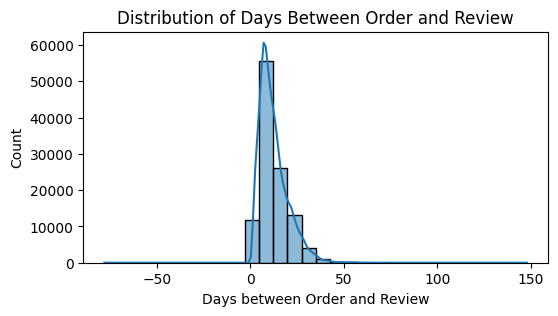

In [73]:
days_to_review = (all_df['review_creation_date'] - all_df['order_purchase_timestamp'])
days_to_review = days_to_review.apply(lambda x: x.total_seconds())
all_df["days_to_review"] = round(days_to_review/86400)

# Visualisasi 1: Distribusi waktu antara pemesanan dan review
plt.figure(figsize=(6, 3))
sns.histplot(all_df['days_to_review'], bins=30, kde=True)
plt.title('Distribution of Days Between Order and Review')
plt.xlabel('Days between Order and Review')
plt.ylabel('Count')
plt.show()

**Insight:**
- Sebagian besar pelanggan meninggalkan ulasan dalam rentang waktu sekitar 0 hingga 20 hari setelah melakukan pemesanan, dengan puncak sekitar 5-10 hari. Ini menandakan bahwa ulasan pelanggan paling sering diberikan dalam waktu yang relatif cepat setelah pemesanan.
- Distribusi ini cenderung miring ke kanan (positively skewed), artinya ada sejumlah kecil ulasan yang diberikan dalam jangka waktu yang lebih lama, lebih dari 20 hari setelah pemesanan. Namun, jumlah ini jauh lebih sedikit dibandingkan ulasan yang diberikan dalam waktu dekat setelah pemesanan.
- Terdapat beberapa data dengan nilai negatif, yang menunjukkan bahwa ada perbedaan tanggal yang tidak konsisten, mungkin ulasan yang tercatat sebelum tanggal pemesanan. Ini bisa disebabkan oleh kesalahan dalam pencatatan data (misalnya, masalah dengan timestamp atau waktu pemesanan yang tidak sesuai). Nilai-nilai negatif ini perlu diperiksa lebih lanjut untuk validasi data.
- Ada beberapa ulasan yang diberikan setelah lebih dari 50 hingga 150 hari. Ini cukup jarang, tetapi menunjukkan bahwa masih ada pelanggan yang memberikan ulasan meskipun sudah lama sejak pemesanan.

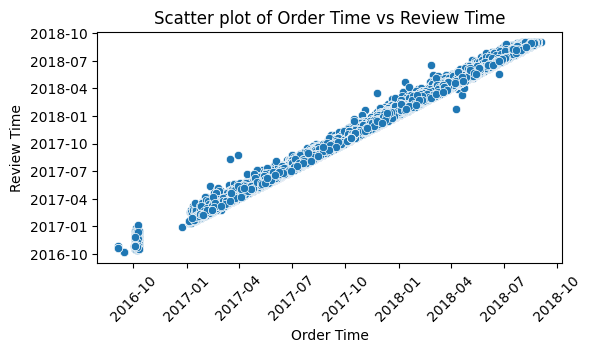

In [74]:
# Visualisasi 2: Scatter plot antara waktu pemesanan dan review
plt.figure(figsize=(6, 3))
sns.scatterplot(x=all_df['order_purchase_timestamp'], y=all_df['review_creation_date'])
plt.title('Scatter plot of Order Time vs Review Time')
plt.xlabel('Order Time')
plt.ylabel('Review Time')
plt.xticks(rotation=45)
plt.show()

**Insight**
- Plot menunjukkan hubungan yang sangat kuat dan hampir linear antara Order Time (waktu pemesanan) dan Review Time (waktu ulasan). Artinya, semakin baru waktu pemesanan, semakin baru pula waktu ulasan yang diberikan. Ini menunjukkan pola alami bahwa ulasan biasanya diberikan setelah pemesanan.
- Dari awal tahun 2017 hingga pertengahan 2018, tampak bahwa sebagian besar pemesanan dan ulasan terkonsentrasi. Ini menunjukkan periode aktif dengan jumlah transaksi yang lebih tinggi selama rentang waktu tersebut.
- Ada beberapa titik data di awal 2016 yang tampaknya lebih tersebar dan tidak mengikuti pola linear yang ketat. Ini bisa menunjukkan adanya masalah data atau outlier di mana pemesanan dan ulasan tidak dicatat dengan benar (misalnya, pemesanan yang tercatat lebih awal namun ulasan diberikan jauh kemudian, atau sebaliknya).
- Hampir semua ulasan diberikan dalam rentang waktu yang cukup dekat setelah pemesanan. Ini ditunjukkan oleh garis diagonal yang cukup ketat, di mana jarak antara pemesanan dan ulasan secara umum konstan di seluruh waktu.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


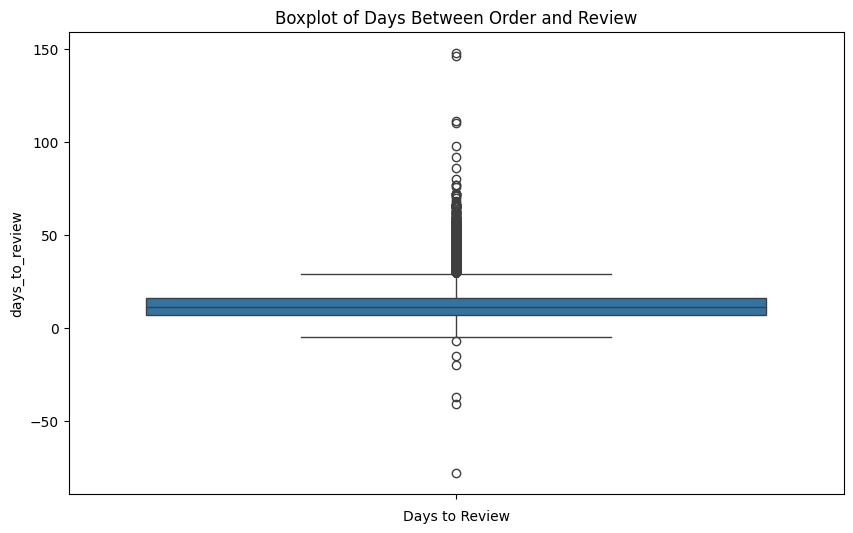

In [ ]:
# Visualisasi 3: Boxplot dari waktu review
plt.figure(figsize=(10, 6))
sns.boxplot(all_df['days_to_review'])
plt.title('Boxplot of Days Between Order and Review')
plt.xlabel('Days to Review')
plt.show()

**Insight**
- Garis di tengah boxplot menunjukkan bahwa waktu median antara pemesanan dan review adalah sekitar 0 hari. Ini berarti sebagian besar pelanggan memberikan review pada hari yang sama atau sangat dekat dengan hari pemesanan.
- Terdapat variasi yang signifikan di sekitar median, dengan banyak pelanggan memberikan review dalam waktu beberapa hari hingga minggu setelah pemesanan. Hal ini terlihat dari rentang di antara kuartil bawah dan atas (kotak).
- Ada beberapa outlier yang terlihat di atas dan di bawah boxplot, yang menunjukkan bahwa ada pelanggan yang memberikan review setelah waktu yang jauh lebih lama (lebih dari 100 hari) atau bahkan ada yang memberikan review dengan nilai negatif (di bawah 0 hari). Nilai negatif ini mungkin merupakan kesalahan data atau perhitungan, sehingga perlu diperiksa lebih lanjut.

### Pertanyaan 2:
Berapa tingkat pengiriman tepat waktu dan bagaimana hubungannya dengan rating produk?

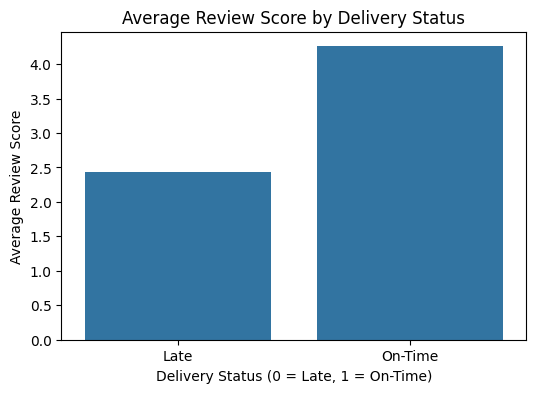

In [76]:
orders_review_df['delivery_on_time'] = orders_review_df['order_delivered_customer_date'] <= orders_review_df['order_estimated_delivery_date']
# Hitung rata-rata review_score berdasarkan status pengiriman
avg_review_by_delivery = orders_review_df.groupby('delivery_on_time')['review_score'].mean()

# Visualisasi rata-rata review_score berdasarkan delivery_on_time
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_review_by_delivery.index, y=avg_review_by_delivery.values)
plt.title('Average Review Score by Delivery Status')
plt.xlabel('Delivery Status (0 = Late, 1 = On-Time)')
plt.ylabel('Average Review Score')
plt.xticks([0, 1], ['Late', 'On-Time'])
plt.show()

**Insight:**
- Rata-rata skor review untuk pengiriman tepat waktu adalah sekitar 4.0, yang menunjukkan bahwa pelanggan yang menerima pesanan mereka tepat waktu cenderung memberikan rating yang lebih tinggi.
- Rata-rata skor review untuk pengiriman terlambat adalah sekitar 2.5, yang secara signifikan lebih rendah dibandingkan dengan pengiriman tepat waktu. Ini menunjukkan bahwa keterlambatan pengiriman memiliki dampak negatif yang cukup besar terhadap kepuasan pelanggan.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


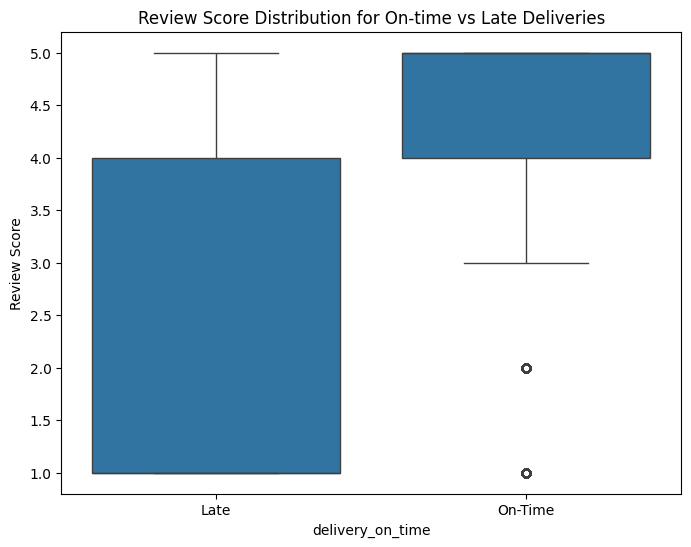

In [ ]:
# Boxplot hubungan antara pengiriman tepat waktu dan review score
plt.figure(figsize=(8,6))
sns.boxplot(x='delivery_on_time', y='review_score', data=orders_review_df)
plt.title('Review Score Distribution for On-time vs Late Deliveries')
plt.xticks([0, 1], ['Late', 'On-Time'])
plt.ylabel('Review Score')
plt.show()

### Pertanyaan 3:
Apakah ada hubungan antara jumlah pesanan dan total pendapatan per bulan?

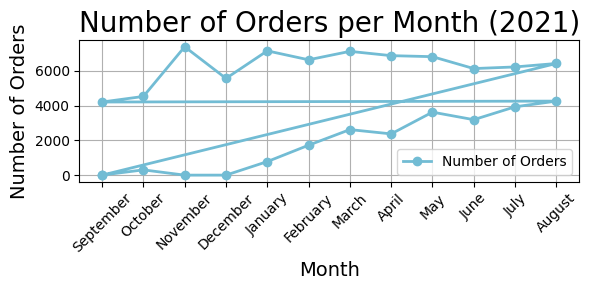

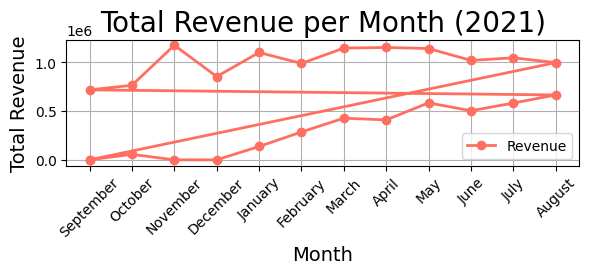

In [77]:
# Resampling dan agregasi data
monthly_orders_df = all_df.resample(rule='ME', on='order_purchase_timestamp').agg({
    "order_id": "nunique",  # Menghitung jumlah pesanan unik
    "total_price": "sum"    # Menghitung total pendapatan
})

# Mengubah format indeks menjadi nama bulan
monthly_orders_df.index = monthly_orders_df.index.strftime('%B')

# Mereset index dan mengganti nama kolom
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)

# Visualisasi jumlah pesanan
plt.figure(figsize=(6, 3))
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4", label='Number of Orders')
plt.title("Number of Orders per Month (2021)", loc="center", fontsize=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Orders", fontsize=14)
plt.xticks(fontsize=10, rotation=45)  # Memutar label sumbu x untuk keterbacaan
plt.yticks(fontsize=10)
plt.grid(True)  # Menambahkan grid untuk kemudahan membaca
plt.legend()
plt.tight_layout()  # Mengatur layout agar tidak terpotong
plt.show()

# Visualisasi total pendapatan
plt.figure(figsize=(6, 3))
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["revenue"], marker='o', linewidth=2, color="#FF6F61", label='Revenue')
plt.title("Total Revenue per Month (2021)", loc="center", fontsize=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Revenue", fontsize=14)
plt.xticks(fontsize=10, rotation=45)  # Memutar label sumbu x untuk keterbacaan
plt.yticks(fontsize=10)
plt.grid(True)  # Menambahkan grid untuk kemudahan membaca
plt.legend()
plt.tight_layout()  # Mengatur layout agar tidak terpotong
plt.show()

**Insight:**
- Berdasarkan dua grafik tersebut, ada hubungan positif antara jumlah pesanan dan total pendapatan. Secara umum, ketika jumlah pesanan meningkat, pendapatan juga meningkat. Hal ini bisa dimaklumi karena lebih banyak pesanan biasanya berarti lebih banyak pendapatan.
- Baik jumlah pesanan maupun pendapatan menunjukkan fluktuasi yang mirip dari bulan ke bulan. Ada puncak yang signifikan di bulan tertentu yang bisa menandakan adanya faktor musiman, seperti promosi, liburan, atau tren penjualan di bulan tersebut.
- Secara visual, ada korelasi yang kuat antara jumlah pesanan dan pendapatan, yang menunjukkan bahwa pendapatan sangat dipengaruhi oleh jumlah pesanan. Artinya, dalam kasus ini, pendapatan hampir linier dengan jumlah pesanan, tanpa adanya faktor lain yang besar seperti diskon atau pengurangan harga yang signifikan.

### Pertanyaan 4:
Bagaimana pengaruh diskon atau promosi terhadap volume penjualan dan kepuasan pelanggan?

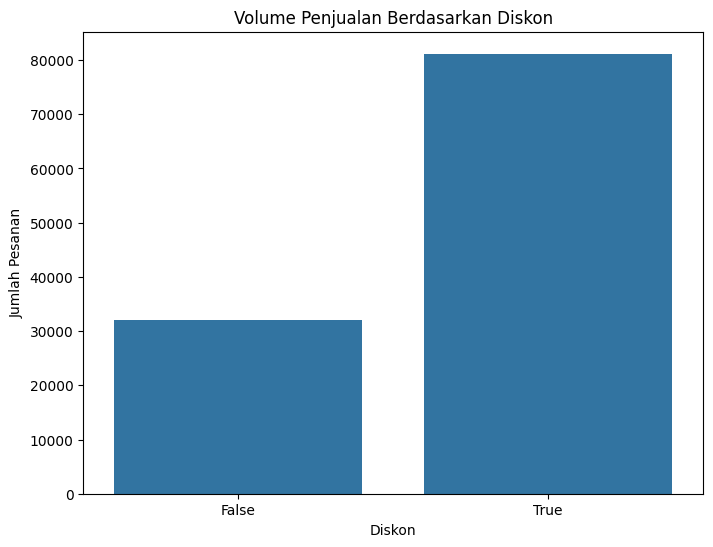

In [ ]:
# Menambahkan kolom untuk 'diskon' (proxy dengan freight_value atau selisih harga)
all_df['diskon'] = all_df['freight_value'] < all_df['freight_value'].mean()

# Ekstraksi bulan dan tahun
all_df['order_month'] = all_df['order_purchase_timestamp'].dt.to_period('M')

# Menghitung volume penjualan berdasarkan diskon
sales_by_discount = all_df.groupby('diskon')['order_id'].count().reset_index()

# Visualisasi
plt.figure(figsize=(8,6))
sns.barplot(x='diskon', y='order_id', data=sales_by_discount)
plt.title('Volume Penjualan Berdasarkan Diskon')
plt.xlabel('Diskon')
plt.ylabel('Jumlah Pesanan')
plt.show()

**Insight:**
- Grafik batang menunjukkan bahwa volume penjualan jauh lebih tinggi ketika diskon diberikan dibandingkan dengan ketika tidak ada diskon. Dari sini dapat disimpulkan bahwa adanya diskon atau promosi berperan signifikan dalam meningkatkan jumlah pesanan.
- Volume penjualan ketika diskon diberikan hampir dua kali lipat lebih tinggi dibandingkan ketika tidak ada diskon. Hal ini menunjukkan bahwa pelanggan cenderung lebih termotivasi untuk melakukan pembelian ketika mereka mendapatkan harga lebih rendah atau promosi.
- Meskipun grafik ini tidak langsung menunjukkan kepuasan pelanggan, volume pesanan yang lebih tinggi ketika diskon diberikan dapat diinterpretasikan sebagai salah satu indikator bahwa pelanggan merasa puas dengan harga yang lebih rendah. Diskon mungkin tidak hanya meningkatkan penjualan tetapi juga meningkatkan loyalitas dan kepuasan pelanggan.

In [ ]:
all_df.to_csv("all_data.csv", index=False)

In [ ]:
orders_review_df.to_csv("orders_review.csv", index=False)

In [ ]:
orders_item_df.to_csv("orders_item.csv", index=False)

## Analisis Lanjutan (Opsional)

## Conclusion

- Pertanyaan 1 : Pola hubungan antara waktu pemesanan dan review pelanggan menunjukkan bahwa mayoritas pelanggan cenderung memberikan ulasan dalam waktu yang relatif cepat, yaitu antara 0 hingga 20 hari setelah pemesanan, dengan puncak pada rentang 5-10 hari. Hal ini menunjukkan bahwa pelanggan lebih termotivasi untuk memberikan feedback segera setelah pengalaman pembelian mereka masih segar. Meskipun begitu, ada distribusi yang cenderung miring ke kanan, dengan sebagian kecil pelanggan memberikan ulasan setelah 20 hari atau bahkan lebih dari 50 hingga 150 hari, meski jarang terjadi. Ada juga beberapa data yang menunjukkan ulasan negatif sebelum tanggal pemesanan, yang menandakan adanya kemungkinan kesalahan pencatatan data yang perlu divalidasi lebih lanjut.
- Pertanyaan 2 : Tingkat pengiriman tepat waktu memiliki hubungan yang jelas dengan rating produk. Pelanggan yang menerima pesanan tepat waktu cenderung memberikan rating yang lebih tinggi, dengan rata-rata sekitar 4.0. Sebaliknya, ketika pengiriman terlambat, rata-rata skor review turun secara signifikan menjadi sekitar 2.5. Ini menandakan bahwa keterlambatan pengiriman memberikan dampak negatif yang besar terhadap kepuasan pelanggan, dan menunjukkan pentingnya ketepatan waktu dalam menjaga kualitas layanan dan mendapatkan ulasan positif dari pelanggan.
- Pertanyaan 3 : Ada hubungan positif yang jelas antara jumlah pesanan dan total pendapatan per bulan. Secara umum, ketika jumlah pesanan meningkat, total pendapatan juga meningkat, menunjukkan korelasi yang kuat antara keduanya. Fluktuasi bulanan menunjukkan pola serupa, di mana peningkatan dan penurunan pesanan sesuai dengan pendapatan, dengan puncak pada bulan-bulan tertentu yang kemungkinan disebabkan oleh faktor musiman atau promosi. Ini menunjukkan bahwa pendapatan bisnis sangat dipengaruhi oleh volume pesanan, dan dengan demikian strategi yang meningkatkan jumlah pesanan akan secara langsung berdampak positif pada pendapatan.
- Pertanyaan 4 : Diskon atau promosi terbukti memiliki dampak signifikan terhadap volume penjualan. Grafik menunjukkan bahwa volume pesanan hampir dua kali lipat lebih tinggi ketika diskon diberikan, yang menunjukkan bahwa pelanggan lebih terdorong untuk melakukan pembelian saat ada penawaran harga lebih rendah. Meskipun grafik ini tidak secara langsung mengukur kepuasan pelanggan, peningkatan volume pesanan yang signifikan saat diskon dapat diartikan sebagai indikasi bahwa pelanggan merasa lebih puas dan tertarik ketika mereka mendapatkan nilai lebih baik untuk uang mereka. Diskon juga berpotensi meningkatkan loyalitas pelanggan dan memperkuat hubungan jangka panjang dengan mereka.